<a href="https://colab.research.google.com/github/GabrielRibeiro5402/churn_clientes/blob/main/CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn de clientes

---

O que é churn? Churn é uma métrica utilizada para mostrar o número de clientes que cancelam serviço em um determinado período de tempo.

## **Análise Explóratoria:**

---

## Fazendo a leitura dos dados


In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/churn.csv')

In [3]:
dados.head()

,id_cliente,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,15634602,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0


A coluna `id_cliente` não ira ser usada para nada então é possivel retira - lá

In [4]:
dados = dados.drop(columns= 'id_cliente', axis = 1)
dados

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Homem,39,5,0.00,2,1,0,96270.64,0
9996,516,França,Homem,35,10,57369.61,1,1,1,101699.77,0
9997,709,França,Mulher,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemanha,Homem,42,3,75075.31,2,1,0,92888.52,1


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   score_credito        10000 non-null  int64  
 1   pais                 10000 non-null  object 
 2   sexo_biologico       10000 non-null  object 
 3   idade                10000 non-null  int64  
 4   anos_de_cliente      10000 non-null  int64  
 5   saldo                10000 non-null  float64
 6   servicos_adquiridos  10000 non-null  int64  
 7   tem_cartao_credito   10000 non-null  int64  
 8   membro_ativo         10000 non-null  int64  
 9   salario_estimado     10000 non-null  float64
 10  churn                10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
dados.isnull().sum()

score_credito          0
pais                   0
sexo_biologico         0
idade                  0
anos_de_cliente        0
saldo                  0
servicos_adquiridos    0
tem_cartao_credito     0
membro_ativo           0
salario_estimado       0
churn                  0
dtype: int64

Sem dados nulos

## Explorando as Variáveis Categóricas:

In [7]:
import plotly.express as px

In [8]:
px.histogram(dados, x ='churn', text_auto=True)

In [9]:
px.histogram(dados, x ='pais', color = 'churn', barmode = 'group', text_auto=True)

In [10]:
px.histogram(dados, x ='sexo_biologico', color = 'churn', barmode = 'group', text_auto=True)

In [11]:
px.histogram(dados, x ='tem_cartao_credito', color = 'churn', barmode = 'group', text_auto=True)

In [12]:
px.histogram(dados, x ='membro_ativo', color = 'churn', barmode = 'group', text_auto=True)

In [13]:
px.box(dados, x = 'score_credito', color = 'churn')

In [14]:
px.box(dados, x = 'idade', color = 'churn')

In [15]:
px.box(dados, x = 'anos_de_cliente', color = 'churn')

In [16]:
px.box(dados, x = 'saldo', color = 'churn')

In [17]:
px.box(dados, x = 'servicos_adquiridos', color = 'churn')

In [18]:
px.box(dados, x = 'salario_estimado', color = 'churn')

# Transformação de dados

In [19]:
dados

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Homem,39,5,0.00,2,1,0,96270.64,0
9996,516,França,Homem,35,10,57369.61,1,1,1,101699.77,0
9997,709,França,Mulher,36,7,0.00,1,0,1,42085.58,1
9998,772,Alemanha,Homem,42,3,75075.31,2,1,0,92888.52,1


In [20]:
dados.columns

Index(['score_credito', 'pais', 'sexo_biologico', 'idade', 'anos_de_cliente',
       'saldo', 'servicos_adquiridos', 'tem_cartao_credito', 'membro_ativo',
       'salario_estimado', 'churn'],
      dtype='object')

Para utilizar os dados nos algoritmos de Machine Learning, precisamos informar quais são as variáveis explicativas e qual é a variável alvo. Farei, a separação da base de dados de churn entre as variáveis explicativas, armazenando em uma variável x e a variável alvo em y.

In [21]:
x = dados.drop('churn', axis = 1)
y = dados['churn']

Variáveis categóricas que estejam em formato de texto não podem ser utilizadas diretamente nos modelos de Machine Learning. Sera a transformação das variáveis categóricas para o formato numérico usando o OneHotEncoder, utilizando o parâmetro `drop='if_binary'` caso alguma variável tenha apenas 2 categorias.

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
colunas = x.columns

In [24]:
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'),
    ['pais', 'sexo_biologico', 'tem_cartao_credito', 'membro_ativo']
), remainder = 'passthrough',
   sparse_threshold = 0)

In [25]:
x = one_hot.fit_transform(x)

In [26]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__pais_Alemanha', 'onehotencoder__pais_Espanha',
       'onehotencoder__pais_França',
       'onehotencoder__sexo_biologico_Mulher',
       'onehotencoder__tem_cartao_credito_1',
       'onehotencoder__membro_ativo_1', 'remainder__score_credito',
       'remainder__idade', 'remainder__anos_de_cliente',
       'remainder__saldo', 'remainder__servicos_adquiridos',
       'remainder__salario_estimado'], dtype=object)

In [27]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out(colunas))

,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__sexo_biologico_Mulher,onehotencoder__tem_cartao_credito_1,onehotencoder__membro_ativo_1,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__salario_estimado
0,0.0,0.0,1.0,1.0,1.0,1.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,0.0,1.0,0.0,1.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,0.0,0.0,1.0,1.0,1.0,0.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,0.0,0.0,1.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,0.0,1.0,0.0,1.0,1.0,1.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,1.0,0.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,0.0,0.0,1.0,0.0,1.0,1.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,0.0,0.0,1.0,1.0,0.0,1.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,1.0,0.0,0.0,0.0,1.0,0.0,772.0,42.0,3.0,75075.31,2.0,92888.52


A variável alvo, como é do tipo categórica, também precisa passar por um tratamento similar às variáveis explicativas categóricas para que possa ser usada nos algoritmos. Vai ser utilizado o método LabelEncoder para fazer a transformação da variável churn.

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder = LabelEncoder()

In [30]:
y = label_encoder.fit_transform(y)

In [31]:
y

array([1, 0, 1, ..., 1, 1, 0])

# Divisão de treino e teste

---



A separação dos dados entre conjunto de treinamento e teste é essencial para compreender se um modelo está conseguindo aprender os padrões e generalizar para novos dados.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify= y, random_state= 5)

# Modelo de base

---


O modelo mais simples de classificar os dados é simplesmente utilizar de um modelo que chuta todos as classificações, chamado **dummy classifier**. Esse algoritmo classifica todos os registros da base de dados com base na categoria da variável alvo de maior frequência, ou seja, a que tem uma contagem maior na nossa base de dados.

Um modelo de base é muito importante para definir um critério de comparação para modelos mais complexos. Nesta etapa, é criado um modelo de base com o `DummyClassifier` e encontrado a taxa de acerto com o método **score**.

In [34]:
from sklearn.dummy import DummyClassifier

In [35]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)

dummy.score(x_test, y_test)

0.7964

# Árvore de decisão

---

**A árvore de decisão é um algoritmo que faz as classificações a partir de decisões simples tomadas a partir dos dados**. Temos que tomar certo cuidado para não utilizar uma profundidade muito grande, porque isso pode provocar um sobreajuste do modelo aos dados de treinamento. Criarei um modelo de árvore de decisão com o parâmetro `max_depth=4`,e será avaliado o desempenho do modelo nos dados de teste e visualizando as decisões da árvore usando o método `plot_tree`.

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
arvore = DecisionTreeClassifier(max_depth= 4, random_state=5)
arvore.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [38]:
arvore.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1])

In [39]:
arvore.score(x_test, y_test)

0.8464

In [40]:
arvore.score(x_test, y_test)

0.8464

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [42]:
nome_colunas = ['pais_Alemanha',
                'pais_Espanha',
                'pais_França',
                'sexo_biologico_Mulher',
                'tem_cartao_credito_1',
                'membro_ativo_1',
                'score_credito',
                'idade',
                'anos_de_cliente',
                'saldo',
                'servicos_adquiridos',
                'salario_estimado'
                ]

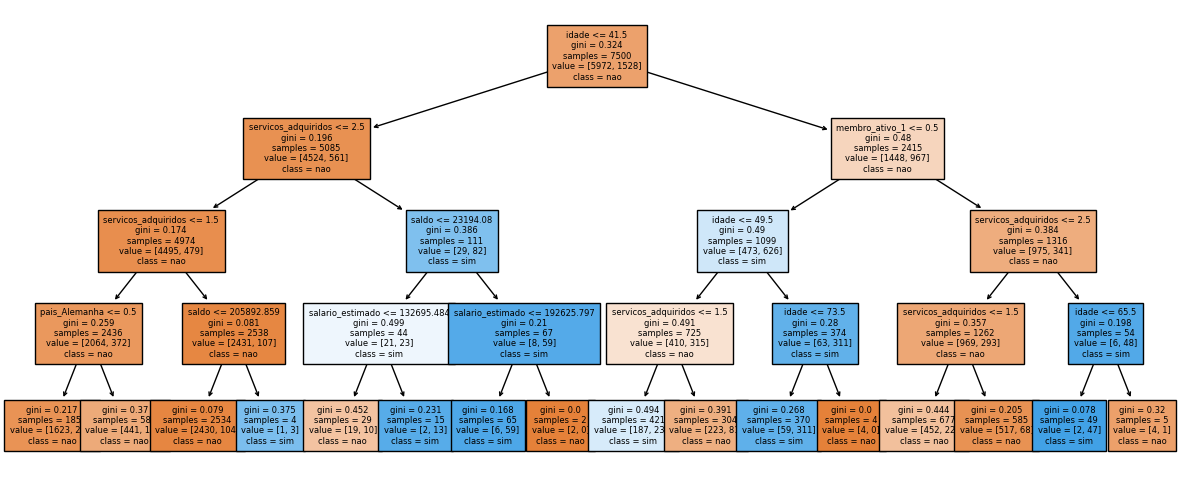

In [43]:
plt.figure(figsize = (15,6))
plot_tree(arvore, filled=True, class_names = ['nao', 'sim'], fontsize = 6, feature_names = nome_colunas);

# Normalização dos dados

---



A normalização de dados é uma tarefa importante para manter todos os valores numéricos em uma mesma escala e garantir que todas as características tenham o mesmo impacto no modelo. Aqui a normalização da base de dados será feita usando o `MinMaxScaler`.

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
normalizacao = MinMaxScaler()
X_train_normalizado = normalizacao.fit_transform(x_train)

In [46]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,1.0,1.0,1.0,0.0,0.796,0.216216,0.8,0.000000,0.333333,0.267600
1,0.0,0.0,1.0,0.0,0.0,1.0,0.612,0.256757,0.2,0.000000,0.333333,0.338919
2,1.0,0.0,0.0,1.0,1.0,0.0,0.634,0.256757,0.5,0.386645,0.666667,0.890516
3,0.0,0.0,1.0,1.0,1.0,0.0,0.514,0.040541,0.0,0.000000,0.333333,0.580365
4,0.0,1.0,0.0,1.0,0.0,1.0,0.374,0.270270,0.6,0.594774,0.000000,0.738898
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1.0,0.0,0.0,0.0,1.0,0.0,0.590,0.391892,0.9,0.637940,0.000000,0.609048
7496,0.0,1.0,0.0,1.0,1.0,0.0,0.676,0.229730,0.6,0.000000,0.000000,0.127054
7497,0.0,1.0,0.0,1.0,1.0,0.0,0.646,0.229730,0.6,0.000000,0.333333,0.492884
7498,0.0,0.0,1.0,1.0,1.0,0.0,0.720,0.202703,0.2,0.000000,0.333333,0.364454


Com os dados normalizados, podemos utilizar o modelo KNN

# Utilizando KNN

---



 O **KNN** faz cálculos de distância para encontrar os vizinhos mais próximos. Nesta parte, será criado um modelo **KNN** usando o` KNeighborsClassifier` com os dados normalizados e avaliado o desempenho nos dados de teste, também normalizados.|

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier()

In [49]:
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [50]:
X_test_normalizado = normalizacao.transform(x_test)

In [51]:
knn.score(X_test_normalizado, y_test)

0.8172

# Avaliando o modelo com melhor ácuracia

---



In [52]:
print(f'Acurácia Dummy : {dummy.score(x_test, y_test)}')
print(f'Acurácia Árvore de Decisão : {arvore.score(x_test, y_test)}')
print(f'Acurácia KNN : {knn.score(X_test_normalizado, y_test)}')

Acurácia Dummy : 0.7964
Acurácia Árvore de Decisão : 0.8464
Acurácia KNN : 0.8172


O modelo com a melhor acurácia como podemos notar foi o modelo de Árvore de Decisão

# Exportando o melhor modelo

---



In [53]:
import pickle

In [54]:
with open('modelo_onehotenc.pkl', 'wb') as arquivo:
    pickle.dump(one_hot, arquivo)


In [55]:
with open('modelo_arvore.pkl', 'wb') as arquivo:
  pickle.dump(arvore, arquivo)

# Utilizando modelo salvo

---



In [56]:
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': [1],
    'membro_ativo': [1],
    'salario_estimado': [85270.00]
})


In [57]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado
0,850,França,Homem,27,3,56000,1,1,1,85270.0


In [58]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arvore = pd.read_pickle('/content/modelo_arvore.pkl')


In [59]:
novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)


array([0])

Isso indica que a previsão foi o valor 0, que indica que não será churn. Logo, o cliente não deixará de utilizar os serviços.